# Chapter 5 tidyverse 통합 패키지

## 1 tidyverse 이해

* Hadley Wickham이 개발한 데이터 과학을 위한 R 패키지의 집합체(collection)
* 모든 패키지는 공통적이고 일관된 설계 철학, 문법, 데이터 구조를 공유함
* 정돈된 세계(tidy + universe)를 구성하여 작업을 직관적이고 일관성있게 수행하도록 도와줌
* tidy API의 4가지 원칙
> 기존 자료구조의 재사용(reuse existing data structures)
> 
> 파이프 연산자를 이용한 단순한 함수 조합(compose simple function with pipe) : 굉장히 좋은 특징
> 
> 함수형 프로그래밍을 적극 포용(embrace functional programming)
> 
> 사람을 위한 설계(design for humans)

|패키지|설명|
|:-:|:-|
|`tibble`|`tidyverse`에서 사용하는 R 데이터 객체 제공 -> 데이터프레임|
|`readr`|`tibble`로 외부 파일을 불러오거나 저장하는 함수 제공|
|`tidyr`|타이디 데이터(tidy data)를 구현하는 함수 제공 -> 판다스 느낌|
|`dplyr`|데이터 가공, 탐색적 자료분석 등을 위한 함수 제공 -> 데이터 전처리 핵심, 매우 중요|
|`stringr`|문자열(string)을 다루는 함수 제공|
|`forcats`|팩터(factor)를 다루는 함수 제공|
|`lubridate`, `hms`|날짜, 시간을 다루는 함수 제공|
|`purrr`|함수형 프로그래밍 도구 제공|
|`ggplot2`|데이터 시각화를 위한 함수 제공 -> 시각화 핵심, 두 번째로 중요|

## 2. tidyverse 작업 흐름

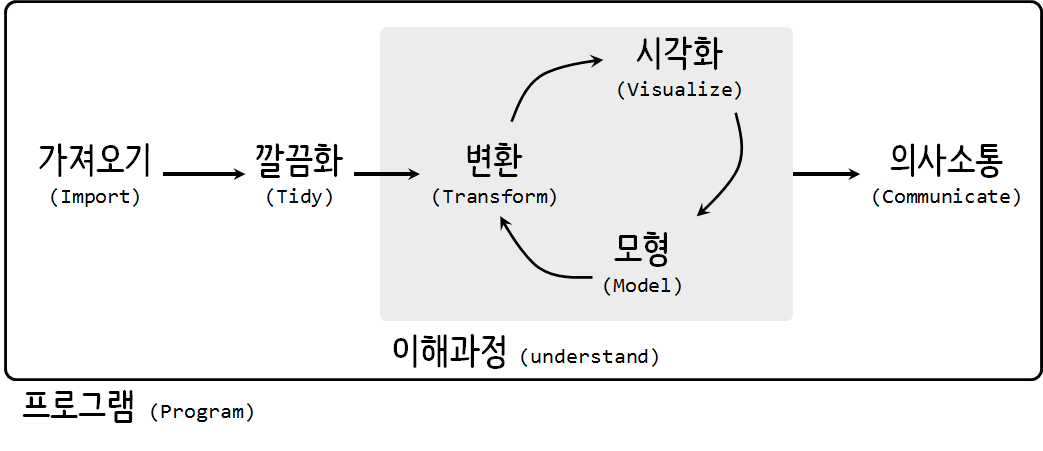

> 데이터 가져오고(`readr`), 타이디데이터로 만들고(`tidyr`), 필요하다면 변환(`dplyr`, ...)/모델링(`purrr`)/시각화(`ggplot2`)를 하고, 최종적으로 결과가 나오면 커뮤니케이션

## 3. 타이디 데이터

* `tidyverse`에서 사용되는 데이터 표준 저장 형태. 분석에 용이하고 깔끔한 데이터
* 타이디 데이터의 세가지 규칙

> 1. 모든 열은 변수이다 Every column is variable
> 2. 모든 행은 관측값이다 Every row is an observation
> 3. 모든 셀은 단일 값을 가진다 Every cell is a single value <- 원소성
>
> 데이터 테이블과 동일

## 4. 파이프 연산자

* `%>%` - 다중 연산을 하나의 순차적인 연산의 결합으로 표현하는 강력한 도구
* 단축키 : `ctrl + shift + m`
* 패키지 `magrittr`을 불러와야 사용할 수 있음. 또는 `tidyverse`를 가져올 경우 사용 가능
    * 왼쪽 표현식(Left-Hand Side expression)의 결과를 오른쪽 표현식(Right-Hand Side expression)으로 전달함
    * 이 때, 왼쪽 표현식은 오른쪽 표현식의 첫 번째 매개변수로 사용됨
    * 왼쪽 표현식이 사용될 위치를 지정하기 위해서는 오른쪽 표현식에서 place-holder;`.`로 적을 수 있음
    * ```R
      x %>% f(data, option = .)
      ```
* 연산작업 중 어느 위치에서나 쉽게 단계를 추가할 수 있음
* 복잡한 코드를 단순화시켜 가독성 크게 향상시킴
* R version 4.1.0부터는 기본 파이프 연산자 `|>` 새롭게 추가됨
    * 인자없이 함수를 호출하더라도 항상 괄호가 필요함
    * place-holder로 `_`를 사용하며, **이때 반드시 전달받을 인자를 명시해야 함**.

`ctrl + shift + m`으로 기본 파이프 연산자를 불러올 수도 있음. 디폴트는 `tidyverse`에 있는 `%>%`.

> Tools > General Options > Code에서 Use native pipe operator, |> (requires R 4.1+) 옵션을 설정
>
> 하지만 일단 파이프연산자는 `tidyverse`의 것을 활용하자.

```R
## magrittr 파이프 연산자
library(tidyverse)

mtcars %>% head %>% lapply(summary)
mtcars %>% lm(mpg~disp, .)
mtcars %>% .$gear

## R 기본 파이프 연산자
mtcars |> head(4)
mtcars |> head  ## error. 매개변수가 있든 없든 생략이 안됨
mtcars |> lm(mpg~disp, _)  ## error. 첫 번째 인자가 아닌 경우 파라미터 이름을 명시해야만 함
mtcars |> lm(mpg~disp, data = _)
```

## 5. tibble 패키지

* tidyverse에서 사용하는 R 데이터 자료구조
* 좀 더 편리하게 사용할 수 있도록 수정된 특수한 종류의 데이터프레임으로, 데이터프레임과 근본적으로 큰 차이는 없음
* **데이터를 출력할 때 콘솔 창이 넘어가지 않도록 설계되어 있음**
    * `str()` 함수 기능을 가져와 각 변수(열)의 자료형과 변수 이름을 함께 표시 -> 변수의 자료형과 이름, 표시되지 않은 변수까지
    * 처음 10개의 행과 한 화면에 들어갈 수 있는 열만 표시 -> 콘솔 창에서 표시할 수 있는 너비까지만
    * 전체 데이터셋을 보기 위해서는 `View()` 함수 사용 -> 새 탭에서 데이터를 전체 표시
* 입력 유형(input’s type)이 변하지 않음
* 변수명을 수정할 수 없으며, 행 이름과 산술연산을 지원하지 않음

해당 패키지의 데이터를 사용해봄

```R
install.packages("nycflights13")
library(nycflights13)

flights
```

|변수 라벨|설명|
|:-:|:-:|
|`<chr>`|문자형(character)|
|`<int>`|정수형(integer)|
|`<dbl>`|실수형(double)|
|`<date>`|날짜(date)|
|`<time>`|시간(time)|
|`<dttm>`|날짜와 시간(date-time)|
|`<lgl>`|논리형(logical)|
|`+lbl`|변수의 값에 부여된 라벨 값이 추가되어 있음을 표시|

### A. tibble의 이해

```R
## 데이터프레임과 동일하게 선언 가능
tibble(
    x = 1:5,
    y = 1
)

## 방금 만든 변수를 활용하여 새로운 변수 생성 가능. 선형 변환. 바닐라 데이터프레임은 안됨
tibble(
    x = 1:5,
    y = 1,
    z = x^2 + y
)

## 문자열을 백틱으로 감싸면 규칙을 위반하는 변수명도 사용할 수 있음
mytbl <- tibble(
  x = 1:5,
  y = 1,
  z = x^2 + y,
  `1st` = 11:15,
  `2nd` = 21:25,
  `  1asdf$%#  *&( `= 31:35
)

## 상호 변환

## e
```